In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
# open several csv files: results/{default, cap, danish, decima}/tpch_{job_num}_{trace}/times_{0,1,2,3}.csv
# parse datetimes for the 'start_time' and 'end_time' columns
job_num = 25
trace = "CAISO"

baseline_0 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
baseline_1 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
baseline_2 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
baseline_3 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

cap_0 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
cap_1 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
cap_2 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
cap_3 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

danish_0 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
danish_1 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
danish_2 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
danish_3 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

decima_0 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
decima_1 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
decima_2 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
decima_3 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

# drop rows that have no data
baseline_0 = baseline_0.dropna()
baseline_1 = baseline_1.dropna()
baseline_2 = baseline_2.dropna()
baseline_3 = baseline_3.dropna()

cap_0 = cap_0.dropna()
cap_1 = cap_1.dropna()
cap_2 = cap_2.dropna()
cap_3 = cap_3.dropna()

danish_0 = danish_0.dropna()
danish_1 = danish_1.dropna()
danish_2 = danish_2.dropna()
danish_3 = danish_3.dropna()

decima_0 = decima_0.dropna()
decima_1 = decima_1.dropna()
decima_2 = decima_2.dropna()
decima_3 = decima_3.dropna()

dfs = [baseline_0, baseline_1, baseline_2, baseline_3, cap_0, cap_1, cap_2, cap_3, danish_0, danish_1, danish_2, danish_3, decima_0, decima_1, decima_2, decima_3]

# view the head of first 4
print(baseline_0.head())
print(cap_0.head())
print(danish_0.head())
print(decima_0.head())

   job_id                 start_time                   end_time  \
0       0 2024-12-11 01:57:41.797874 2024-12-11 01:58:36.947619   
1       1 2024-12-11 01:57:47.857531 2024-12-11 01:58:31.323210   
2       2 2024-12-11 01:57:49.078839 2024-12-11 01:59:49.875949   
3       3 2024-12-11 01:58:19.419802 2024-12-11 02:00:24.622375   
4       4 2024-12-11 01:58:22.227967 2024-12-11 02:10:47.507280   

   carbon_footprint                                          executors  
0        149.445333  [('58:12', 'tpc-h-v3-0-0-spark-7d7f4b93b36fea5...  
1         18.680667  [('58:17', 'tpc-h-v3-0-0-spark-30297b93b370058...  
2        360.810167  [('58:18', 'tpc-h-v3-0-0-spark-e7982893b370084...  
3        278.740667  [('58:49', 'tpc-h-v3-0-0-spark-8c4fff93b3707ce...  
4       1583.288833  [('58:49', 'tpc-h-v3-0-0-spark-d34bc193b370871...  
   job_id                 start_time                   end_time  \
0       0 2024-12-11 02:22:02.047563 2024-12-11 02:22:43.404995   
1       1 2024-12-11 02:2

In [88]:
# for each of the four dataframes, compute the total carbon footprint for the first 20 rows (sum of all the carbon footprints)
total_carbon_baseline = baseline_0['carbon_footprint'].head(100).sum()
total_carbon_cap = cap_0['carbon_footprint'].head(100).sum()
total_carbon_danish = danish_0['carbon_footprint'].head(100).sum()
total_carbon_decima = decima_0['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline:', total_carbon_baseline)
print('Total Carbon Footprint for cap:', total_carbon_cap)
print('Total Carbon Footprint for danish:', total_carbon_danish)
print('Total Carbon Footprint for decima:', total_carbon_decima)


Total Carbon Footprint for baseline: 14833.82133333331
Total Carbon Footprint for cap: 7244.438666666669
Total Carbon Footprint for danish: 6938.5109999999995
Total Carbon Footprint for decima: 13878.457666666638


In [89]:
# do the same thing for the _1 files
total_carbon_baseline_1 = baseline_1['carbon_footprint'].head(100).sum()
total_carbon_cap_1 = cap_1['carbon_footprint'].head(100).sum()
total_carbon_danish_1 = danish_1['carbon_footprint'].head(100).sum()
total_carbon_decima_1 = decima_1['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_1:', total_carbon_baseline_1)
print('Total Carbon Footprint for cap_1:', total_carbon_cap_1)
print('Total Carbon Footprint for danish_1:', total_carbon_danish_1)
print('Total Carbon Footprint for decima_1:', total_carbon_decima_1)

Total Carbon Footprint for baseline_1: 10754.909166666654
Total Carbon Footprint for cap_1: 9484.640999999998
Total Carbon Footprint for danish_1: 5917.2165
Total Carbon Footprint for decima_1: 10128.690500000019


In [90]:
# and the same for the _2 files
total_carbon_baseline_2 = baseline_2['carbon_footprint'].head(100).sum()
total_carbon_cap_2 = cap_2['carbon_footprint'].head(100).sum()
total_carbon_danish_2 = danish_2['carbon_footprint'].head(100).sum()
total_carbon_decima_2 = decima_2['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_2:', total_carbon_baseline_2)
print('Total Carbon Footprint for cap_2:', total_carbon_cap_2)
print('Total Carbon Footprint for danish_2:', total_carbon_danish_2)
print('Total Carbon Footprint for decima_2:', total_carbon_decima_2)

Total Carbon Footprint for baseline_2: 13639.355999999972
Total Carbon Footprint for cap_2: 8956.006999999992
Total Carbon Footprint for danish_2: 5877.2893333333495
Total Carbon Footprint for decima_2: 7876.924499999977


In [91]:
# and the same for the _3 files
total_carbon_baseline_3 = baseline_3['carbon_footprint'].head(100).sum()
total_carbon_cap_3 = cap_3['carbon_footprint'].head(100).sum()
total_carbon_danish_3 = danish_3['carbon_footprint'].head(100).sum()
total_carbon_decima_3 = decima_3['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_3:', total_carbon_baseline_3)
print('Total Carbon Footprint for cap_3:', total_carbon_cap_3)
print('Total Carbon Footprint for danish_3:', total_carbon_danish_3)
print('Total Carbon Footprint for decima_3:', total_carbon_decima_3)

Total Carbon Footprint for baseline_3: 13120.622166666708
Total Carbon Footprint for cap_3: 11274.874166666636
Total Carbon Footprint for danish_3: 7531.004500000009
Total Carbon Footprint for decima_3: 15211.543833333319


In [92]:
# compute average across all files
average_carbon_baseline = (total_carbon_baseline + total_carbon_baseline_1 + total_carbon_baseline_2 + total_carbon_baseline_3) / 4
average_carbon_cap = (total_carbon_cap + total_carbon_cap_1 + total_carbon_cap_2 + total_carbon_cap_3) / 4
average_carbon_danish = (total_carbon_danish + total_carbon_danish_1 + total_carbon_danish_2 + total_carbon_danish_3) / 4
average_carbon_decima = (total_carbon_decima + total_carbon_decima_1 + total_carbon_decima_2 + total_carbon_decima_3) / 4

# print the results
print('Average Carbon Footprint for baseline:', average_carbon_baseline)
print('Average Carbon Footprint for cap:', average_carbon_cap)
print('Average Carbon Footprint for danish:', average_carbon_danish)
print('Average Carbon Footprint for decima:', average_carbon_decima)

Average Carbon Footprint for baseline: 13087.177166666661
Average Carbon Footprint for cap: 9239.990208333322
Average Carbon Footprint for danish: 6566.00533333334
Average Carbon Footprint for decima: 11773.90412499999


In [99]:
# for each of the four dataframes, compute the total time
# total time is the difference between start_time in the first row and the end_time in the last row
# all of these are datetime objects
total_time_baseline = baseline_0['end_time'].head(job_num).iloc[-1] - baseline_0['start_time'].head(job_num).iloc[0]
total_time_cap = cap_0['end_time'].head(job_num).iloc[-1] - cap_0['start_time'].head(job_num).iloc[0]
total_time_danish = decima_0['end_time'].head(job_num).iloc[-1] - decima_0['start_time'].head(job_num).iloc[0]
total_time_decima = danish_0['end_time'].head(job_num).iloc[-1] - danish_0['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline)
print('Total Time for cap:        ', total_time_cap)
print('Total Time for danish:     ', total_time_danish)
print('Total Time for decima:     ', total_time_decima)

Total Time for baseline:    0 days 00:23:48.450551
Total Time for cap:         0 days 00:12:36.866178
Total Time for danish:      0 days 00:13:36.843942
Total Time for decima:      0 days 00:14:27.218928


In [100]:
# do the same time calculation for the _1 files
total_time_baseline_1 = baseline_1['end_time'].head(job_num).iloc[-1] - baseline_1['start_time'].head(job_num).iloc[0]
total_time_cap_1 = cap_1['end_time'].head(job_num).iloc[-1] - cap_1['start_time'].head(job_num).iloc[0]
total_time_danish_1 = decima_1['end_time'].head(job_num).iloc[-1] - decima_1['start_time'].head(job_num).iloc[0]
total_time_decima_1 = danish_1['end_time'].head(job_num).iloc[-1] - danish_1['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_1)
print('Total Time for cap:        ', total_time_cap_1)
print('Total Time for danish:     ', total_time_danish_1)
print('Total Time for decima:     ', total_time_decima_1)

Total Time for baseline:    0 days 00:23:26.458618
Total Time for cap:         0 days 00:19:01.264036
Total Time for danish:      0 days 00:10:40.450872
Total Time for decima:      0 days 00:13:04.237522


In [101]:
# do the same time calculation for the _2 files
total_time_baseline_2 = baseline_2['end_time'].head(job_num).iloc[-1] - baseline_2['start_time'].head(job_num).iloc[0]
total_time_cap_2 = cap_2['end_time'].head(job_num).iloc[-1] - cap_2['start_time'].head(job_num).iloc[0]
total_time_danish_2 = decima_2['end_time'].head(job_num).iloc[-1] - decima_2['start_time'].head(job_num).iloc[0]
total_time_decima_2 = danish_2['end_time'].head(job_num).iloc[-1] - danish_2['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_2)
print('Total Time for cap:        ', total_time_cap_2)
print('Total Time for danish:     ', total_time_danish_2)
print('Total Time for decima:     ', total_time_decima_2)

Total Time for baseline:    0 days 00:13:46.004474
Total Time for cap:         0 days 00:17:29.637569
Total Time for danish:      0 days 00:14:00.474552
Total Time for decima:      0 days 00:11:09.741714


In [102]:
# do the same time calculation for the _3 files
total_time_baseline_3 = baseline_3['end_time'].head(job_num).iloc[-1] - baseline_3['start_time'].head(job_num).iloc[0]
total_time_cap_3 = cap_3['end_time'].head(job_num).iloc[-1] - cap_3['start_time'].head(job_num).iloc[0]
total_time_danish_3 = decima_3['end_time'].head(job_num).iloc[-1] - decima_3['start_time'].head(job_num).iloc[0]
total_time_decima_3 = danish_3['end_time'].head(job_num).iloc[-1] - danish_3['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_3)
print('Total Time for cap:        ', total_time_cap_3)
print('Total Time for danish:     ', total_time_danish_3)
print('Total Time for decima:     ', total_time_decima_3)

Total Time for baseline:    0 days 00:21:32.586115
Total Time for cap:         0 days 00:23:05.579245
Total Time for danish:      0 days 00:20:49.919650
Total Time for decima:      0 days 00:18:33.310632


In [103]:
# compute averages 
average_time_baseline = ( total_time_baseline_1 + total_time_baseline_2 + total_time_baseline_3) / 3
average_time_cap = ( total_time_cap_1 + total_time_cap_2 + total_time_cap_3) / 3
average_time_danish = ( total_time_danish_1 + total_time_danish_2 + total_time_danish_3) / 3
average_time_decima = ( total_time_decima_1 + total_time_decima_2 + total_time_decima_3) / 3

# print the results
print('Average Total Time for baseline:', average_time_baseline)
print('Average Total Time for cap:', average_time_cap)
print('Average Total Time for danish:', average_time_danish)
print('Average Total Time for decima:', average_time_decima)

Average Total Time for baseline: 0 days 00:19:35.016402333
Average Total Time for cap: 0 days 00:19:52.160283333
Average Total Time for danish: 0 days 00:15:10.281691333
Average Total Time for decima: 0 days 00:14:15.763289333


In [104]:
# compute average across all files
average_carbon_baseline = ( total_carbon_baseline_1 + total_carbon_baseline_2 + total_carbon_baseline_3) / 3
average_carbon_cap = ( total_carbon_cap_1 + total_carbon_cap_2 + total_carbon_cap_3) / 3
average_carbon_danish = ( total_carbon_danish_1 + total_carbon_danish_2 + total_carbon_danish_3) / 3
average_carbon_decima = ( total_carbon_decima_1 + total_carbon_decima_2 + total_carbon_decima_3) / 3

# print the results
print('Average Carbon Footprint for baseline:', average_carbon_baseline)
print('Average Carbon Footprint for cap:', average_carbon_cap)
print('Average Carbon Footprint for danish:', average_carbon_danish)
print('Average Carbon Footprint for decima:', average_carbon_decima)

Average Carbon Footprint for baseline: 12504.962444444443
Average Carbon Footprint for cap: 9905.174055555543
Average Carbon Footprint for danish: 6441.836777777787
Average Carbon Footprint for decima: 11072.386277777774


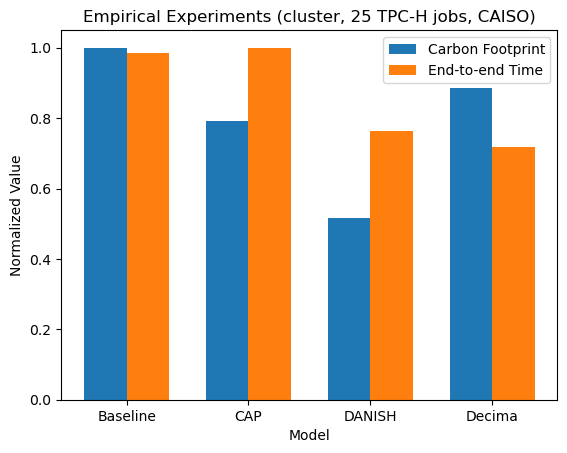

In [107]:
# plot the carbon footprint and completion time, normalized to the max of each
# bar plot in matplotlib
# make sure to label the axes and give a title
# save the plot as 'carbon_time_plot.png'

import matplotlib.pyplot as plt

carbon_data = [average_carbon_baseline, average_carbon_cap, average_carbon_danish, average_carbon_decima]
time_data = [average_time_baseline, average_time_cap, average_time_danish, average_time_decima]

carbon_data = [x / max(carbon_data) for x in carbon_data]
time_data = [x / max(time_data) for x in time_data]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(4)

bar1 = ax.bar(index, carbon_data, bar_width, label='Carbon Footprint')
bar2 = ax.bar(index + bar_width, time_data, bar_width, label='End-to-end Time')
legend = ['Baseline', 'CAP', 'DANISH', 'Decima']
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Value')
ax.set_title('Empirical Experiments (cluster, 25 TPC-H jobs, CAISO)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(legend)
ax.legend()
